# 4. Linear Algebra

- Linear algebra is the branch of mathematics that deals with vector spaces.
- It underpins a large number of data science concepts and techniques

In [1]:
import re, math, random # regexes, math functions, random numbers
import matplotlib.pyplot as plt # pyplot
from collections import defaultdict, Counter
from functools import partial, reduce

## Vectors
- Vectors are points in some finite-dimensional space.
- Think of your data as vectors
- A good way to represent numeric data

- three-dimensional vectors (height, weight, age)
- student grades as four-dimensional vectors (exam1, exam2, exam3, exam4)
- A list of three numbers corresponds to a vector in three-dimensional space

    ```python
    height_weight_age = [70, # inches,
                         170, # pounds,
                         40 ] # years
    grades = [95, # exam1
              80, # exam2
              75, # exam3
              62 ] # exam4
    ```

### Arithmetic on vectors
- We will define vector operations
- Imagine these python codes as mathematical defintions <b>for explanation</b>
- Lists are terrible in performance
- Must use <b>numpy arrays</b> in real applications with large data

<b>Adding two vectors</b>

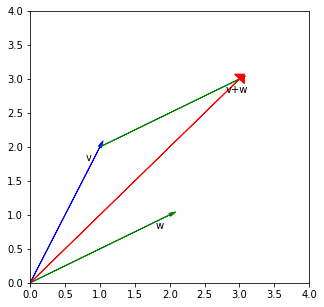

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.axis([0,4,0,4])

v = np.array([1,2])
w = np.array([2,1])
plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(0, 0, w[0], w[1], head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.arrow(v[0], v[1], w[0], w[1], head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.arrow(0, 0, v[0]+w[0], v[1]+w[1], head_width=0.20, head_length=0.1, fc='r', ec='r')
offset=np.array([-0.2,-0.2])
plt.annotate('v', xy=v+offset)
plt.annotate('w', xy=w+offset)
plt.annotate('v+w', xy=v+w+offset)
plt.show()

In [3]:
def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

- Adding two vectors
<img src="img/vector_add.png" width=400>

In [4]:
def vector_subtract(v, w): # 벡터 차
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors): # 벡터 합 -> add 를 계속 reduce
     return reduce(vector_add, vectors)

def scalar_multiply(c, v): # 벡터 크기 * 스칼라 곱
     return [c * v_i for v_i in v]

def vector_mean(vectors): # 벡터의 centroid
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

<b>numpy version</b>

In [5]:
# numpy version
import numpy as np

u = np.array([1,1,1])
v = np.array([1,0,0])
w = np.array([0,1,0])
print(v + w) # vector_add
print(v - w) # vector_subtract
vs = np.array([u ,v, w]) # vectors
print(np.sum(vs, axis=0)) # vector_sum
print(10 * v) # scalar_multiply
print(np.mean(vs, axis=0)) # vector_mean

[1 1 0]
[ 1 -1  0]
[2 2 1]
[10  0  0]
[0.66666667 0.66666667 0.33333333]


In [6]:
def dot(v, w): # 내적 
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def magnitude(v): # distance
     return math.sqrt(sum_of_squares(v))

<b>numpy version</b>

In [7]:
v = np.array([1,0,0])
w = np.array([0,1,0])
print(np.dot(v,w)) # dot
print(v.dot(w)) # dot
print(np.dot(v,v)) # sum_of_squares
print(np.sqrt(np.dot(v,v))) # magnitude
print(np.linalg.norm(v)) # magnitude

0
0
1
1.0
1.0


### Dot product as vector projection
- 𝐯's projection on 𝐰: 𝐯1

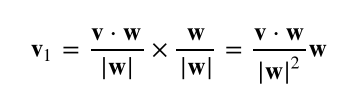

- Euclidean Distance between two vectors:

    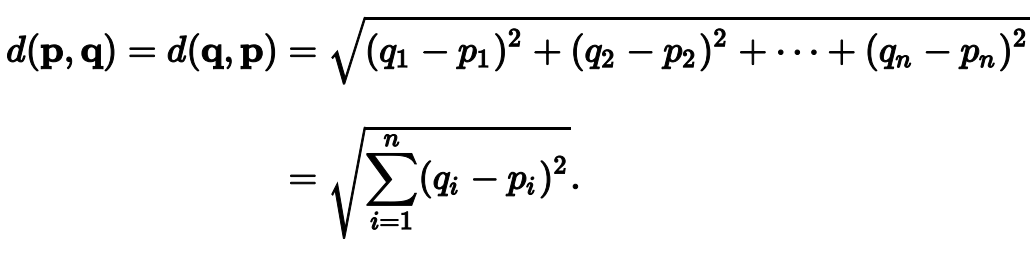

- Manhattan distance

    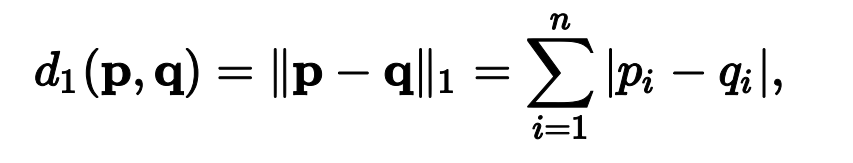

- Cosine similarity

    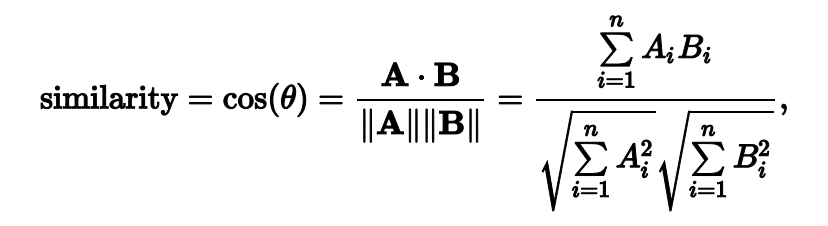

Proof(https://proofwiki.org/wiki/Cosine_Formula_for_Dot_Product)

In [8]:
def squared_distance(v, w):
     return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
     return math.sqrt(squared_distance(v, w))

def manhattan_distance(v, w):
     return sum(math.fabs(v_i - w_i) for v_i, w_i in zip(v, w))

In [9]:
def cosine_similarity(v, w):
     return dot(v, w) / (magnitude(v) * magnitude(w))

v = [0,1,1,0]
w = [0,100,100,0]
u = [1,0,0,1]
y = [-1,0,0,-1]

print(cosine_similarity(v, w))
print(cosine_similarity(u, v))
print(cosine_similarity(u,y))

0.9999999999999999
0.0
-0.9999999999999998


<b>numpy version</b>

In [10]:
import numpy as np
v = np.array([1,1])
w = np.array([10,10])
print(np.dot(v - w, v - w)) # squared_distance
print(np.sqrt(np.dot(v - w, v - w))) # (euclidean) distance
print(np.sum(np.fabs(v - w))) # manhattan_distance
print(np.dot(v,w) / (np.sqrt(np.dot(v,v)) * np.sqrt(np.dot(w,w)))) # cosine sim

162
12.727922061357855
18.0
0.9999999999999998


- Since all componetns are nonnegative in document vectors, cosine similarity is between 0 and 1, cosine_distance is

```python
cosine_distance(v, w) = 1 - cosine_similarity(v, w)
```

In [11]:
def cosine_distance(v, w):
     return 1 - cosine_similarity(v, w)

## Matrices
- Matrix is a two-dimensional collection of numbers.
- We will represent matrices as list s of list s
- If A is a matrix, then A[i][j] is the element in the ith row and the jth column.

```python
    A = [[1, 2, 3],
         [4, 5, 6]] # A has 2 rows and 3 columns
    
    B = [[1, 2],
         [3, 4],
         [5, 6]] # B has 3 rows and 2 columns
```
- if you had the heights, weights, and ages of 1,000 people, you could put them in a matrix:
```python
    data = [[70, 170, 40],
             [65, 120, 26],
             [77, 250, 19],
             # ....
             ]
```

In [12]:
#
# functions for working with matrices
#
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

def get_row(A, i):
     return A[i]

def get_column(A, j):
     return [A_i[j] for A_i in A]

def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix
    whose (i,j)-th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j) for j in range(num_cols)]
            for i in range(num_rows)]

def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0

identity_matrix = make_matrix(5, 5, is_diagonal)

import random
random_matrix = make_matrix(5, 5, lambda i, j: random.choice([0,1]))
random_matrix

[[1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0],
 [1, 1, 0, 1, 1],
 [1, 0, 0, 0, 0]]

<b>numpy version</b>

In [13]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])

B = np.array([[1, 2],
              [3, 4],
              [5, 6]])

In [15]:
#### A.shape # shape
A[1,:] # get_row
A[:,1] # get_column
np.eye(5,5) # identity_matrix

# 5 x 5 matrix with random selection of [0,1]
np.array([np.random.choice([0,1]) for _ in np.arange(25)]).reshape(5,5)
np.vectorize(np.int64)(np.random.rand(25) >= 0.5).reshape(5,5) # int

array([[1, 0, 1, 0, 1],
       [0, 1, 1, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 1, 0],
       [1, 0, 1, 1, 0]], dtype=int64)

### Two representations for friendships
- Representation in Chapter 1

In [16]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

- Alternative notation

In [17]:
# user 0 1 2 3 4 5 6 7 8 9
#
friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
               [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1
               [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2
               [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3
               [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4
               [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7
               [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # user 9

In [18]:
friendships[0][2] == 1 # True, 0 and 2 are friends
friendships[0][8] == 1 # False, 0 and 8 are not friends

False

In [19]:
friends_of_five = [i # only need
                     for i, is_friend in enumerate(friendships[5]) # to look at
                     if is_friend] # one row
print(friends_of_five)

[4, 6, 7]


<b>numpy version</b>

In [20]:
friendships = np.array(friendships)
friendships[0, 2] == 1 # True, 0 and 2 are friends
friendships[0, 8] == 1 # False, 0 and 8 are not friends
np.argwhere(friendships[5] == 1) # friends_of_five

array([[4],
       [6],
       [7]], dtype=int64)

### matrix addition

In [21]:
# matrix addition

def matrix_add(A, B):
    if shape(A) != shape(B):
        raise ArithmeticError("cannot add matrices with different shapes")
    
    num_rows, num_cols = shape(A)
    def entry_fn(i, j): return A[i][j] + B[i][j]
    
    return make_matrix(num_rows, num_cols, entry_fn)

<b>numpy version</b>

In [22]:
import numpy as np

A = np.array([[1,1],[2,2]])
B = np.array([[3,3],[4,4]])
print(A + B) # numpy version
print(A * B)
print(np.transpose(A)) # transpose
print(A.T)
print(A.dot(B)) # matrix multiplication
print(np.matmul(A,B))
C = np.array([[1., 2.], [3., 4.]])
print(np.linalg.det(C)) # determinant
print(np.linalg.inv(C)) # inverse
print(C.dot(np.linalg.inv(C)))
print(np.linalg.eig(C))

[[4 4]
 [6 6]]
[[3 3]
 [8 8]]
[[1 2]
 [1 2]]
[[1 2]
 [1 2]]
[[ 7  7]
 [14 14]]
[[ 7  7]
 [14 14]]
-2.0000000000000004
[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]
(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]]))


### More on types of attributes
There are different types of attributes

- Nominal
    - Examples: ID numbers, eye color, zip codes
- Ordinal
    - Examples: rankings (e.g., taste of potato chips on a scale from 1-10), grades, height {tall, medium, short}
- Interval
    - Examples: calendar dates, temperatures in Celsius or Fahrenheit.
- Ratio
    - Examples: temperature in Kelvin, length, time, counts

### Properties of Attribute Values
- The type of an attribute depends on which of the following properties/operations it possesses:
    - Distinctness: =
    - Order: < >
    - Differences: + -
    - Ratios: * /
- Nominal attribute: distinctness
- Ordinal attribute: distinctness & order
- Interval attribute: distinctness, order & meaningful differences
- Ratio attribute: all 4 properties/operations